# Installing the necessary libraries

In [ ]:
#Installing the necessary libraries

! pip install pandas-profiling
! pip3 install pandas_profiling --upgrade

     |████████████████████████████████| 256kB 27.4MB/s 
     |████████████████████████████████| 1.1MB 35.3MB/s 
     |████████████████████████████████| 645kB 27.8MB/s 
     |████████████████████████████████| 112kB 52.0MB/s 
     |████████████████████████████████| 3.1MB 42.3MB/s 
     |████████████████████████████████| 61kB 7.9MB/s 
     |████████████████████████████████| 81kB 10.4MB/s 
     |████████████████████████████████| 10.1MB 26.2MB/s 
     |████████████████████████████████| 296kB 44.8MB/s 
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107437 sha256=ac6a00a470b44d5b3bf97b795c1bbe9cccbcba86b2765eeda0e0b3fd447c1996
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27099 sha256=619d8cb6c5e81068d6ded5d01283b4633cb21c693bbec1c13e22fd2d24bc4e12
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db07

# Mounting the Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing the libraries

In [ ]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

# Exploring the datasets

In [ ]:
''' Printing the patients heart data'''

heart = pd.read_csv('/content/drive/MyDrive/Heart Attack Dataset/heart.csv')
heart.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
''' Shape of the dataset '''

heart.shape

(303, 14)

# Basic EDA and Statistical Analysis

In [ ]:
''' gives information about the data types,columns, null value counts, memory usage etc '''
''' function reference : https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html '''

heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


From the above we can infer that there are no null values present in the dataset

In [ ]:
''' basic statistic details about the data (note only numerical columns would be displayed here unless parameter include="all") '''
''' for reference: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html#pandas.DataFrame.describe '''

heart.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [ ]:
''' Displaying the count of NaN values present in the dataset '''

heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

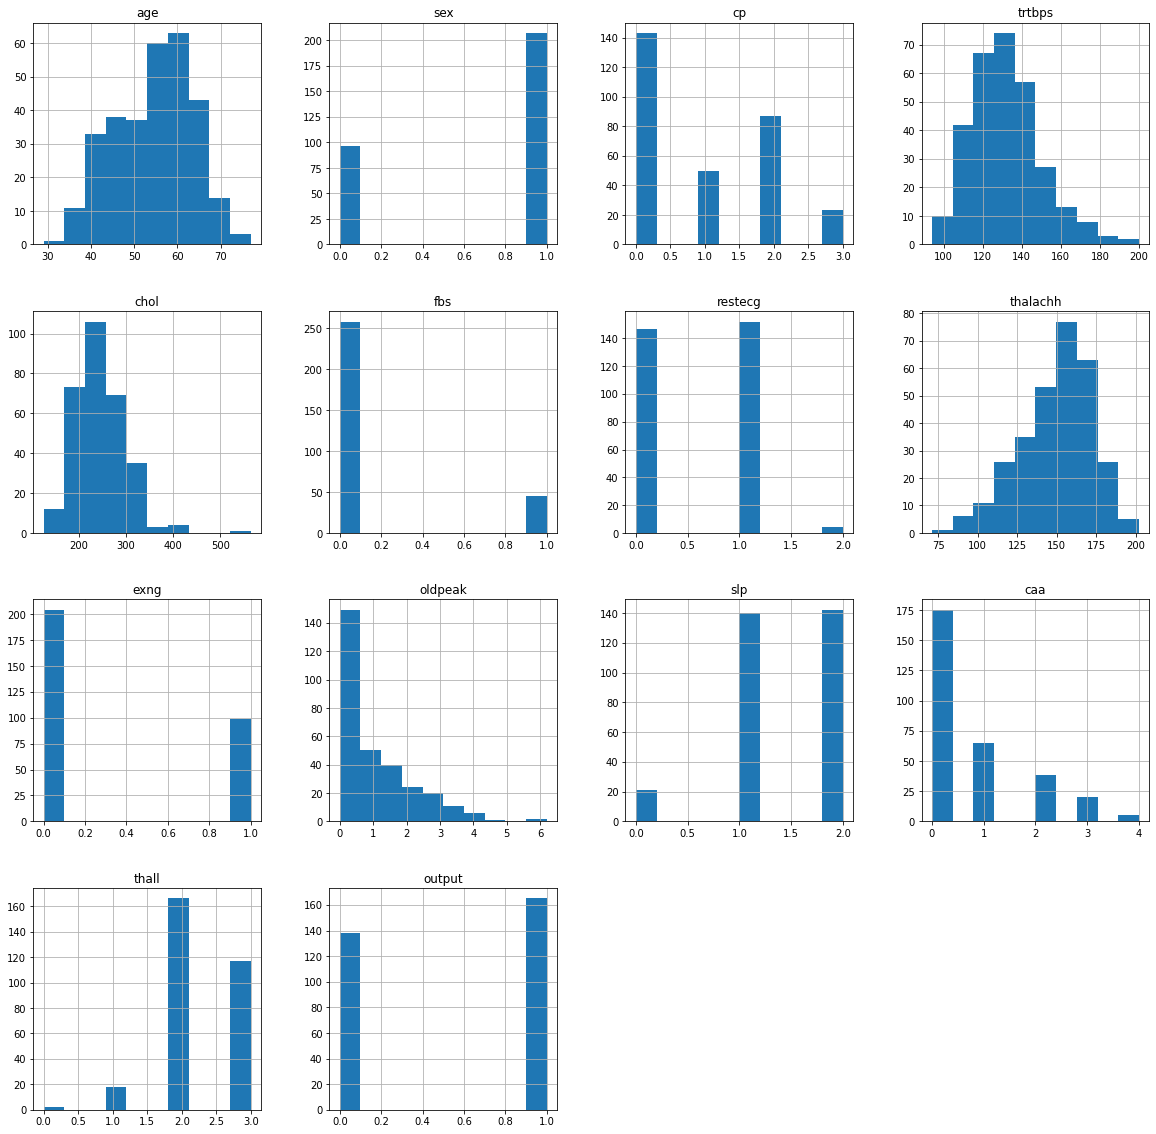

In [ ]:
''' Exploring the data distribution of the dataset using histogram '''

p = heart.hist(figsize = (20,20))

# Skweness and Outliers

For detecting the outliers, we first construct the boxplots of all the numerical variables whilst ignoring the categorical variables.From our dataset, it is very evident that numerical variables are the age,trtbps,chol,thalachh,oldpeak.

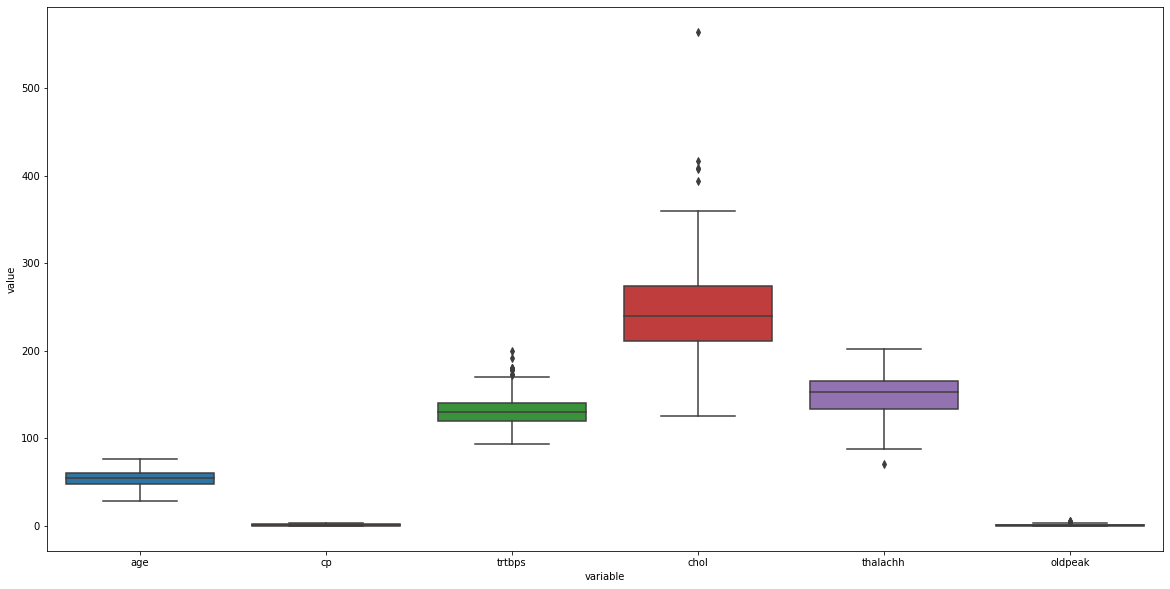

In [ ]:
# Plotting the barplots of all the numerical variables 

#Setting the fig size as 20,10
plt.figure(figsize=(20,10))

#Plotting the Boxplots of all the numerical variables
ax = sns.boxplot(x="variable", y="value", data=pd.melt(heart[['age','cp','trtbps','chol','thalachh','oldpeak']]))

From the boxplot we can observe that features like trtbps,chol,thalachh,oldpeak all have outliers present.Hence we need to handle the outliers for each of them separately.Additionally, we can observe that features age, cp donot exhibit the presence of outliers.The presence of outliers indicate that the distribution of the dataset is skewed.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


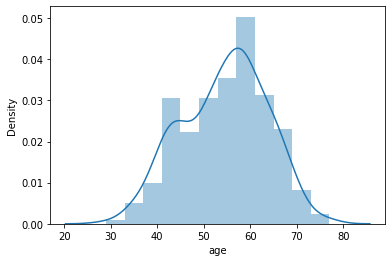

In [ ]:
''' Let's observe the data distribution of 'Age column' and identify and handle the outliers if any'''

sns.distplot(heart['age'])

From the visual inspection, the data appears to have no skew either towards the left or the right, however let's check for skewness.

In [ ]:
''' Checking for outliers in the Age feature '''

# Assuming that the data follows Gaussian distrubution we check for outliers using boundary techniques and box plots. Also we can detect the outliers using z-score

#Calculating the upper and lower boundaries 
upper_boundary=heart['age'].mean() + 1.5* heart['age'].std()
lower_boundary=heart['age'].mean() - 1.5* heart['age'].std()
print(lower_boundary), print(upper_boundary),print(heart['age'].mean())

#Printing the outliers in age column based on upper and lower boundaries
print(heart[(heart['age'] > upper_boundary) & (heart['age'] < lower_boundary)])

40.743185148906576
67.98948811842016
54.366336633663366
Empty DataFrame
Columns: [age, sex, cp, trtbps, chol, fbs, restecg, thalachh, exng, oldpeak, slp, caa, thall, output]
Index: []


From the above box plot and z-score we can infer that there are no skewness present in the above data of age. Also, it confirms that the age column has no outliers present.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


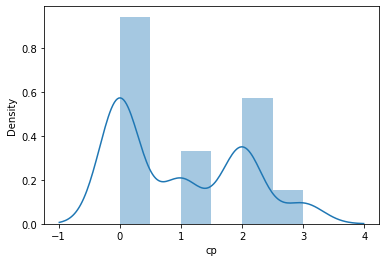

In [ ]:
''' Checking for outliers in 'cp' column '''

sns.distplot(heart['cp'])

In [ ]:
# Assuming that the data follows Gaussian distrubution we check for outliers using z-score and box plots. Also we can detect the outliers using boundary technique

#Calculating the upper and lower boundaries 
upper_boundary=heart['cp'].mean() + 1.5* heart['cp'].std()
lower_boundary=heart['cp'].mean() - 1.5* heart['cp'].std()
print(lower_boundary), print(upper_boundary),print(heart['cp'].mean())

#Printing the outliers in age column based on upper and lower boundaries
print(heart[(heart['cp'] > upper_boundary) & (heart['cp'] < lower_boundary)])

-0.5810820345549816
2.515075433894916
0.966996699669967
Empty DataFrame
Columns: [age, sex, cp, trtbps, chol, fbs, restecg, thalachh, exng, oldpeak, slp, caa, thall, output]
Index: []


From the above box plot and z-score we can infer that there are no skewness present in the above data of cp. Also, it confirms that the cp column has no outliers present.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


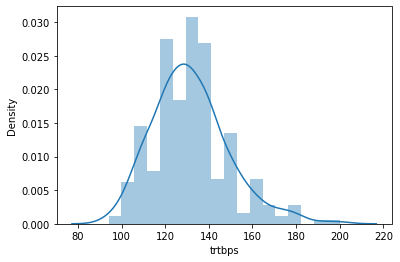

In [ ]:
''' Checking for outliers in 'trtbps' column '''

sns.distplot(heart['trtbps'])

From the above boxplot and the density distrubution function, we can observe that there are outliers present in trtbps.Hence, we need to handle the outliers.We use IQR method to remove the outliers as the distrubution looks slightly skewed towards right.

In [ ]:
# This distribution is slightly skewed towards the right.This indicates the presence of outliers towards the right.

#Calculating the IQR
IQR = heart.trtbps.quantile(0.75) - heart.trtbps.quantile(0.25)

#Calculating the upper and lower boundaries 

lower_bridge=heart['trtbps'].quantile(0.25)-(IQR*1.5)
upper_bridge=heart['trtbps'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

#Printing the outliers in age column based on upper and lower boundaries

print(heart[(heart['trtbps'] > upper_bridge) | (heart['trtbps'] < lower_bridge)])

# Handling the outliers present in the dataset.Here we replace the outliers with mean of the trtbps

heart['trtbps'] = np.where((heart['trtbps'] > upper_bridge) | (heart['trtbps'] < lower_bridge) , int(heart['trtbps'].mean()), heart['trtbps'])

90.0
170.0
     age  sex  cp  trtbps  chol  fbs  ...  exng  oldpeak  slp  caa  thall  output
8     52    1   2     172   199    1  ...     0      0.5    2    0      3       1
101   59    1   3     178   270    0  ...     0      4.2    0    0      3       1
110   64    0   0     180   325    0  ...     1      0.0    2    0      2       1
203   68    1   2     180   274    1  ...     1      1.6    1    0      3       0
223   56    0   0     200   288    1  ...     1      4.0    0    2      3       0
241   59    0   0     174   249    0  ...     1      0.0    1    0      2       0
248   54    1   1     192   283    0  ...     0      0.0    2    1      3       0
260   66    0   0     178   228    1  ...     1      1.0    1    2      3       0
266   55    0   0     180   327    0  ...     1      3.4    1    0      2       0

[9 rows x 14 columns]


From the above, the feature trtbps is now free of outliers

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


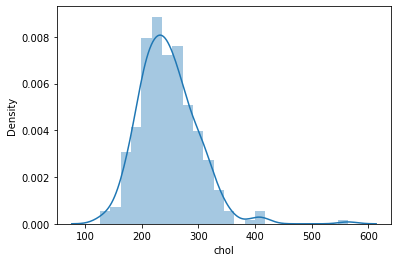

In [ ]:
''' Checking for outliers in 'chol' column '''

sns.distplot(heart['chol'])

In [ ]:
# This distribution is slightly skewed towards the right.This indicates the presence of outliers towards the right.

#Calculating the IQR

IQR = heart.chol.quantile(0.75) - heart.chol.quantile(0.25)

#Calculating the upper and lower boundaries 

lower_bridge=heart['chol'].quantile(0.25)-(IQR*1.5)
upper_bridge=heart['chol'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

#Printing the outliers in age column based on upper and lower boundaries

print(heart[(heart['chol'] > upper_bridge) | (heart['chol'] < lower_bridge)])

# Handling the outliers present in the dataset.Here we replace the outliers with mean of the trtbps

heart['chol'] = np.where((heart['chol'] > upper_bridge) | (heart['chol'] < lower_bridge) , int(heart['chol'].mean()), heart['chol'])

115.75
369.75
     age  sex  cp  trtbps  chol  fbs  ...  exng  oldpeak  slp  caa  thall  output
28    65    0   2     140   417    1  ...     0      0.8    2    1      2       1
85    67    0   2     115   564    0  ...     0      1.6    1    0      3       1
96    62    0   0     140   394    0  ...     0      1.2    1    0      2       1
220   63    0   0     150   407    0  ...     0      4.0    1    3      3       0
246   56    0   0     134   409    0  ...     1      1.9    1    2      3       0

[5 rows x 14 columns]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


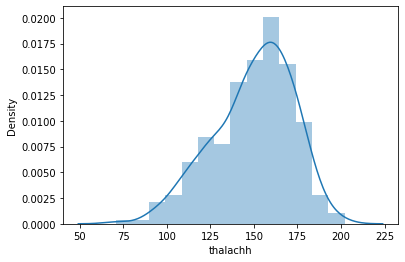

In [ ]:
''' Checking for outliers in 'thalachh' column '''

sns.distplot(heart['thalachh'])

In [ ]:
# This distribution is slightly skewed towards the left.This indicates the presence of outliers towards the left.

#Calculating the IQR

IQR = heart.thalachh.quantile(0.75) - heart.thalachh.quantile(0.25)

#Calculating the upper and lower boundaries 

lower_bridge=heart['thalachh'].quantile(0.25)-(IQR*1.5)
upper_bridge=heart['thalachh'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

#Printing the outliers in age column based on upper and lower boundaries

print(heart[(heart['thalachh'] > upper_bridge) | (heart['thalachh'] < lower_bridge)])

# Handling the outliers present in the dataset.Here we replace the outliers with mean of the trtbps

heart['thalachh'] = np.where((heart['thalachh'] > upper_bridge) | (heart['thalachh'] < lower_bridge) , int(heart['thalachh'].mean()), heart['thalachh'])

84.75
214.75
     age  sex  cp  trtbps  chol  fbs  ...  exng  oldpeak  slp  caa  thall  output
272   67    1   0     120   237    0  ...     0      1.0    1    0      2       0

[1 rows x 14 columns]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


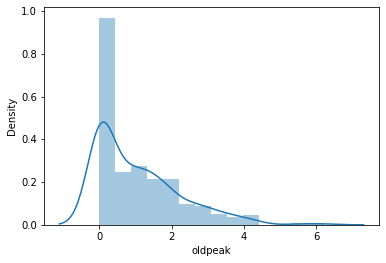

In [ ]:
''' Checking for outliers in 'oldpeak' column '''

sns.distplot(heart['oldpeak'])

In [ ]:
# This distribution is slightly skewed towards the right.This indicates the presence of outliers towards the left.

#Calculating the IQR
IQR = heart.oldpeak.quantile(0.75) - heart.oldpeak.quantile(0.25)

#Calculating the upper and lower boundaries 
lower_bridge=heart['oldpeak'].quantile(0.25)-(IQR*1.5)
upper_bridge=heart['oldpeak'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

#Printing the outliers in age column based on upper and lower boundaries
print(heart[(heart['oldpeak'] > upper_bridge) | (heart['oldpeak'] < lower_bridge)])

# Handling the outliers present in the dataset.Here we replace the outliers with mean of the trtbps

heart['oldpeak'] = np.where((heart['oldpeak'] > upper_bridge) | (heart['oldpeak'] < lower_bridge) , int(heart['oldpeak'].mean()), heart['oldpeak'])

-2.4000000000000004
4.0
     age  sex  cp  trtbps  chol  fbs  ...  exng  oldpeak  slp  caa  thall  output
101   59    1   3     131   270    0  ...     0      4.2    0    0      3       1
204   62    0   0     160   164    0  ...     0      6.2    0    3      3       0
221   55    1   0     140   217    0  ...     1      5.6    0    0      3       0
250   51    1   0     140   298    0  ...     1      4.2    1    3      3       0
291   58    1   0     114   318    0  ...     0      4.4    0    3      1       0

[5 rows x 14 columns]


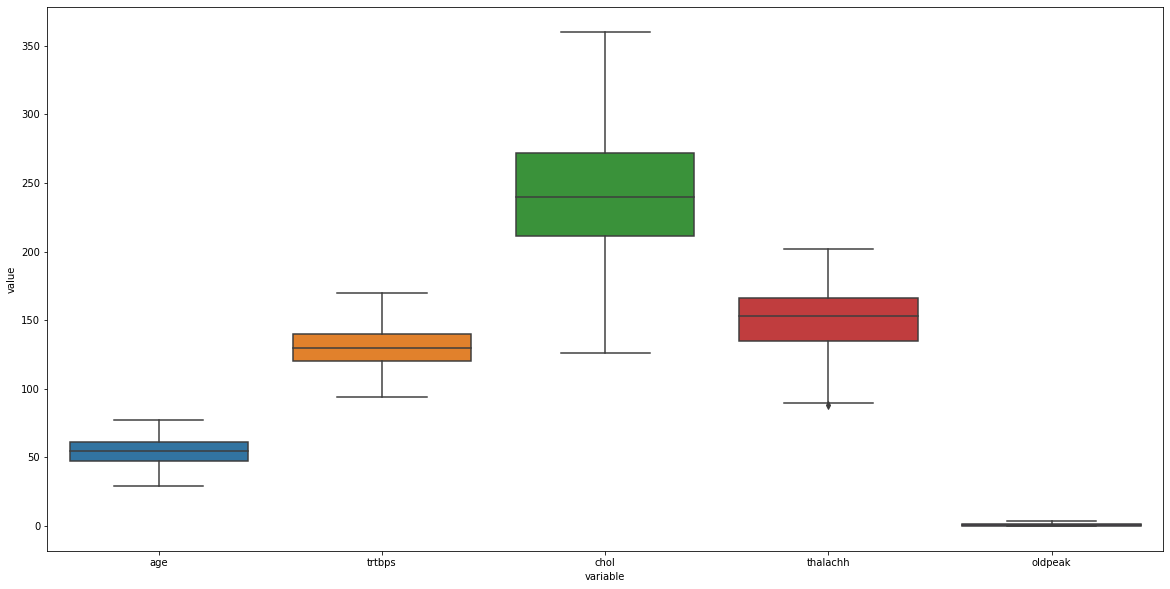

In [ ]:
# Plotting the barplots of all the numerical variables post handling the outliers

#Setting the fig size as 20,10
plt.figure(figsize=(20,10))

#Plotting the Boxplots of all the numerical variables post handling the outliers
ax = sns.boxplot(x="variable", y="value", data=pd.melt(heart[['age','trtbps','chol','thalachh','oldpeak']]))

From the above boxplots we can infer that the outliers are no longer present in the dataset.Now we will further proceed on analyzing the categorical variables present in the dataset.

# Pandas Profiling

In [ ]:
# Applying Pandas profiling on our heart dataset

profile = ProfileReport(heart, title="Heart Dataset", html={"style": {"full_width": True}}, sort=None)

# Display the pandas profile report on a notebook iframe.

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Analyzing the Categorical Variables

**Gender variable**

0 - represents the female

1 - represents the male

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


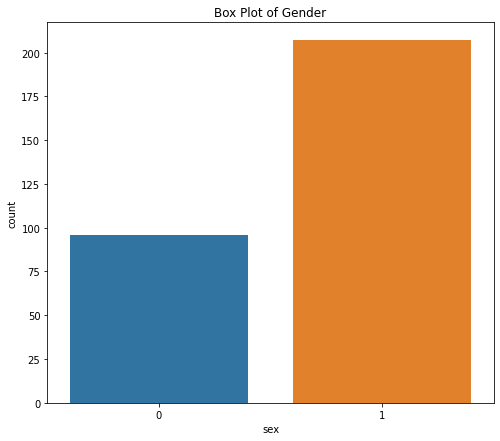

In [ ]:
# Gender variable count

plt.figure(figsize=(8,7))
plt.title('Box Plot of Gender')
sns.countplot(heart['sex'])

We can say that, the proportion of males is higher as compared to the proportion of the females in the dataset

**Chest Pain**

Chest Pain can be of the following types

Value 0: typical angina

Value 1: atypical angina

Value 2: non-anginal pain

Value 3: asymptomatic

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


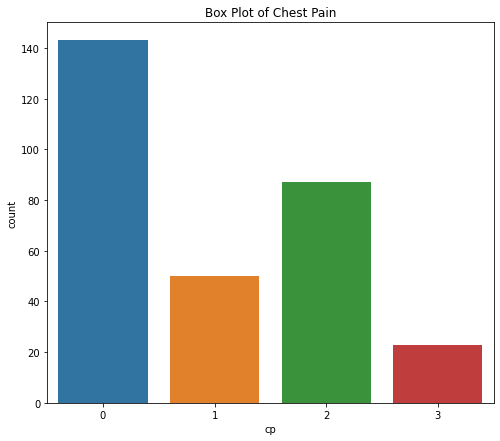

In [ ]:
# Chest Pain variable count

plt.figure(figsize=(8,7))
plt.title('Box Plot of Chest Pain')
sns.countplot(heart['cp'])

So, we can conclude that proprtion of people having typical angina is higher as compared to the others.

**Fasting Blood Sugar Level**

Fasting blood sugar level >120mg/dl

1 - true

0 - false

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


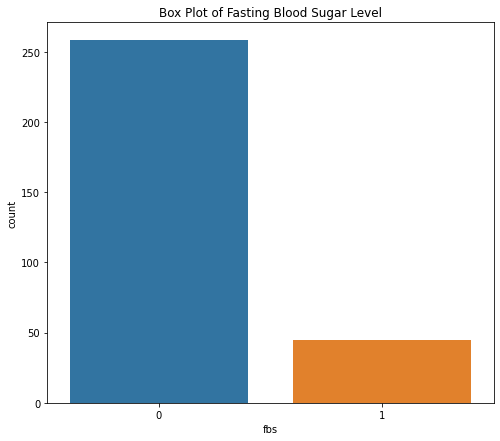

In [ ]:
# Fasting Blood Sugar Level count

plt.figure(figsize=(8,7))
plt.title('Box Plot of Fasting Blood Sugar Level')
sns.countplot(heart['fbs'])

Here the people having normal fasting blood sugar level is high is number than people having High fasting blood sugar level

**Rest Electro-cardiograph results**

Value 0: normal

Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


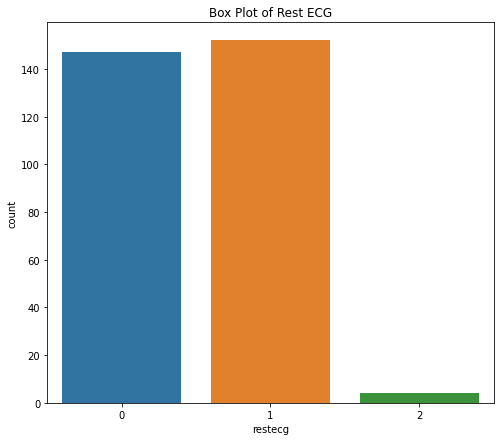

In [ ]:
# Rest ECG variable count

plt.figure(figsize=(8,7))
plt.title('Box Plot of Rest ECG')
sns.countplot(heart['restecg'])

From the above plot we can infer that proportion of people having higher abnormal ECG count is more.

**Excercise Induced Anigna**

0 - No

1 - Yes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


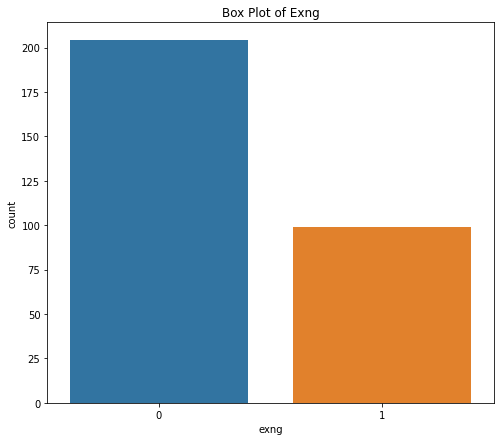

In [ ]:
#Excercise Induced Anigna variable count

plt.figure(figsize=(8,7))
plt.title('Box Plot of Exng')
sns.countplot(heart['exng'])

We cocnlude that proportion of people having no Enigna due to excercise are higher.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


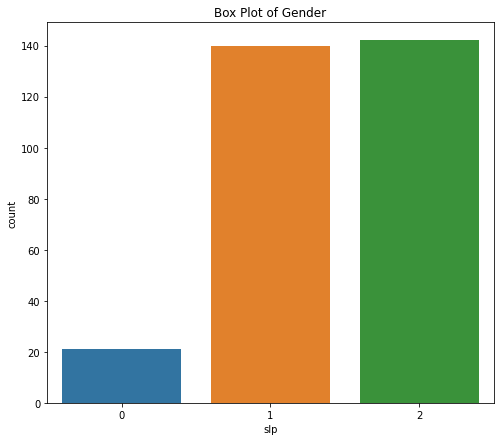

In [ ]:
plt.figure(figsize=(8,7))
plt.title('Box Plot of Gender')
sns.countplot(heart['slp'])

**Major number of arteries**

Major number of arteries ranging from 0 to 4

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


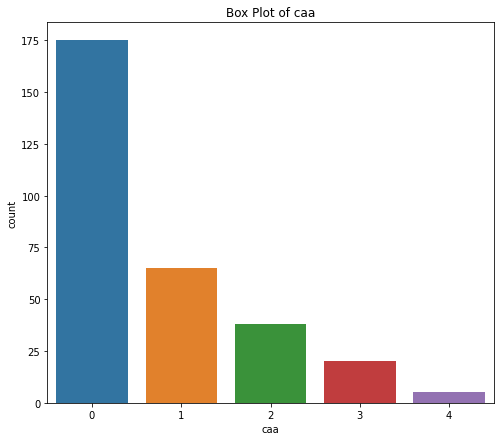

In [ ]:
plt.figure(figsize=(8,7))
plt.title('Box Plot of caa')
sns.countplot(heart['caa'])

**Thall**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


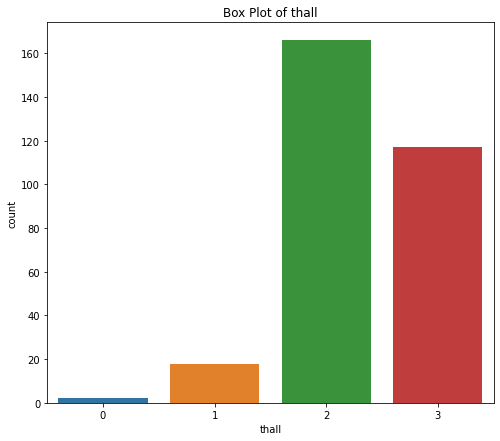

In [ ]:
plt.figure(figsize=(8,7))
plt.title('Box Plot of thall')
sns.countplot(heart['thall'])

**Output**

0 - No heart attack

1 - Having heart attack

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


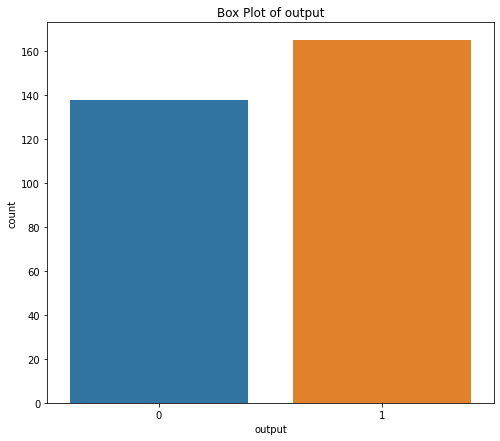

In [ ]:
# Target/Output variable count

plt.figure(figsize=(8,7))
plt.title('Box Plot of output')
sns.countplot(heart['output'])

Number of people having heart attack is higher in the dataset as compared to the number of people having no heart attacks.

Additionally, our target variable seems to be distributed evenly, which should be good for modelling the data

# Correlations 

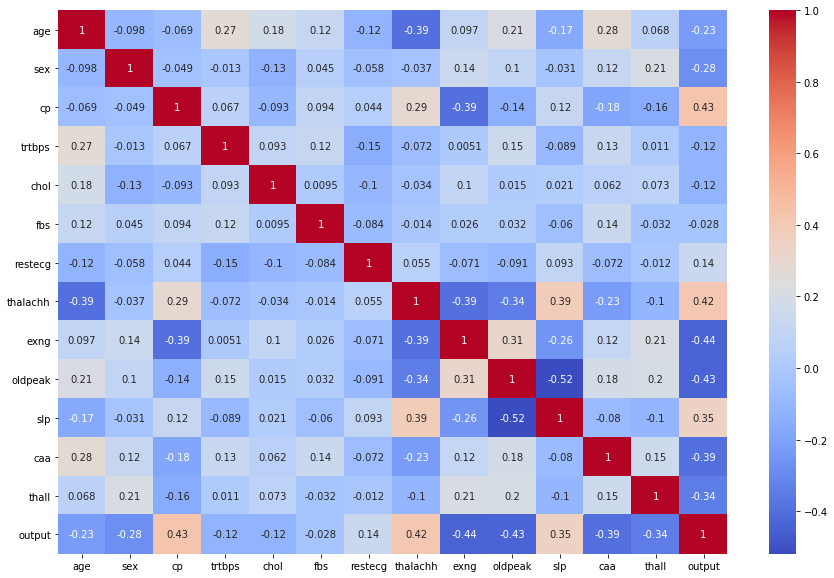

In [ ]:
# Here we plot the correlations among the variables

cor = heart.corr()

plt.figure(figsize=(15,10))

sns.heatmap(cor, annot = True, fmt='.2g', cmap= 'coolwarm')

In [ ]:
'''Finding all the features that are highly correlated with the target variable'''

cor_target = abs(cor['output'])

print('The correlations of features are :\n',cor_target)

'''  Selecting highly correlated features '''

relevant_features = cor_target[cor_target > 0.2] #This will vary depending on the problem statement

print('The relevant features are :\n',relevant_features)

The correlations of features are :
 age         0.225439
sex         0.280937
cp          0.433798
trtbps      0.119391
chol        0.115663
fbs         0.028046
restecg     0.137230
thalachh    0.417692
exng        0.436757
oldpeak     0.432789
slp         0.345877
caa         0.391724
thall       0.344029
output      1.000000
Name: output, dtype: float64
The relevant features are :
 age         0.225439
sex         0.280937
cp          0.433798
thalachh    0.417692
exng        0.436757
oldpeak     0.432789
slp         0.345877
caa         0.391724
thall       0.344029
output      1.000000
Name: output, dtype: float64


On the basis of the correlation we have filtered out the features that have very weak correlation with the dependent variable.The features that have weak correlation are trtbps,restecg,chol and fbs. These features will be ultimately filtered.

In [ ]:
'''Checking for multi-collinearity among independent variables'''
'''One of the assumptions of linear regression is that the independent variables need to be uncorrelated with each other'''

heart[["age","sex","cp","thalachh","exng","oldpeak","slp","caa","thall","output"]].corr()

,age,sex,cp,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,-0.390560,0.096801,0.213599,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.037087,0.141664,0.100299,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.290951,-0.394280,-0.137638,0.119717,-0.181053,-0.161736,0.433798
thalachh,-0.390560,-0.037087,0.290951,1.000000,-0.394455,-0.343513,0.387133,-0.225683,-0.104275,0.417692
exng,0.096801,0.141664,-0.394280,-0.394455,1.000000,0.312065,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.213599,0.100299,-0.137638,-0.343513,0.312065,1.000000,-0.519179,0.182751,0.199954,-0.432789
slp,-0.168814,-0.030711,0.119717,0.387133,-0.257748,-0.519179,1.000000,-0.080155,-0.104764,0.345877
caa,0.276326,0.118261,-0.181053,-0.225683,0.115739,0.182751,-0.080155,1.000000,0.151832,-0.391724
thall,0.068001,0.210041,-0.161736,-0.104275,0.206754,0.199954,-0.104764,0.151832,1.000000,-0.344029
output,-0.225439,-0.280937,0.433798,0.417692,-0.436757,-0.432789,0.345877,-0.391724,-0.344029,1.000000


On visual inspection we can see that none of the independent variables are highly correlated.We can check if the independent variables are highly correlated if the correlation among them is greater than 0.8

In [ ]:
''' Checking for any duplicate items in the data '''

heart[heart.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


We can see that there is a presence of a duplicated row (164).This duplicated row will be deleted before we proceed towards the modelling aspects.

In [ ]:
''' Dropping the duplicate rows '''

heart = heart.drop_duplicates(keep=False, inplace=False)

In [ ]:
''' Choosing the highly correlated features '''

heart_new = heart[["age","sex","cp","thalachh","exng","oldpeak","slp","caa","thall","output"]]

''' Saving the file to a csv '''

heart_new.to_csv('/content/drive/MyDrive/Heart Attack Dataset/heart_new_processed.csv')

The CSV has been pre-processed and stored into a CSV.In the next notebook, we perform the modelling aspects wherein we predict the heart attacks using Neural Networks.

In [ ]:
''' Printing the head of heart_new df '''

heart_new.head(10)

,age,sex,cp,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,150,0,2.3,0,0,1,1
1,37,1,2,187,0,3.5,0,0,2,1
2,41,0,1,172,0,1.4,2,0,2,1
3,56,1,1,178,0,0.8,2,0,2,1
4,57,0,0,163,1,0.6,2,0,2,1
5,57,1,0,148,0,0.4,1,0,1,1
6,56,0,1,153,0,1.3,1,0,2,1
7,44,1,1,173,0,0.0,2,0,3,1
8,52,1,2,162,0,0.5,2,0,3,1
9,57,1,2,174,0,1.6,2,0,2,1
